# ТЗ ID-360
## Выполнил кандидат Тутов Артем
### резюме: (https://spb.hh.ru/resume/7ecc5374ff08b1cf280039ed1f6a36506d3534)

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import re

In [2]:
geo = pd.read_excel('Geography.xlsx')

In [3]:
sales = pd.read_excel('Sales.xlsx')

In [4]:
product = pd.read_excel('Product.xlsx')

## Работа с таблицей geo

In [5]:
geo.head()

,TERRCODE,TERRNAME,AREA,AREANAME,NATIONAL
0,001,ATHENS CENTRAL A,1,ATHENS,NATIONAL
1,002ATHENS CENTRAL B,ATHENS CENTRAL B,1,ATHENS,NATIONAL
2,003,ATHENS CENTRAL KOLONAKI,1,ATHENS,NATIONAL
3,004,ATHENS NORTH CENTRAL 1A,1,ATHENS,NATIONAL
4,005,ATHENS NORTH CENTRAL 1B,1,ATHENS,NATIONAL


In [6]:
geo.tail()

,TERRCODE,TERRNAME,AREA,AREANAME,NATIONAL
65,066,CHIOS-SAMOS-IKARIA,12,AEGEAN,NATIONAL
66,067,DODECANESE,12,AEGEAN,NATIONAL
67,068,CYCLADES,12,AEGEAN,NATIONAL
68,069,HERAKLION-LASITHI,13,CRETE,NATIONAL
69,070,CHANIA-RETHYMNO,13,CRETE,NATIONAL


In [7]:
geo.isna().sum()

TERRCODE    0
TERRNAME    0
AREA        0
AREANAME    0
NATIONAL    0
dtype: int64

In [8]:
geo.dtypes

TERRCODE    object
TERRNAME    object
AREA         int64
AREANAME    object
NATIONAL    object
dtype: object

In [9]:
geo['TERRCODE'].unique()

array(['001', '002ATHENS CENTRAL B', '003', '004', '005', '006', '007',
       '008', '009', '010', '011', '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021', '022', '023', '024', '025',
       '026', '027', '028', '029', '030', '031', '032', '033', '034',
       '035', '036', '037', '038', '039', '040', '041', '042', '043',
       '044', '045', '046', '047', '048', '049', '050', '051', '052',
       '053', '054', '055', '056', '057', '058', '059', '060', '061',
       '062', '063', '064', '065', '066', '067', '068', '069', '070'],
      dtype=object)

In [10]:
geo['TERRCODE'] = geo['TERRCODE'].astype(str).str.replace('[^0-9]', '', regex=True).astype('int8')

In [11]:
#проверка на наличие пробелов. find возвращает -1, если искомое не обнаружено. если nunique выдает 1, то значит все ок
(geo['NATIONAL'].str.find(" ") != -1).nunique()

1

In [12]:
geo.head()

,TERRCODE,TERRNAME,AREA,AREANAME,NATIONAL
0,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL
1,2,ATHENS CENTRAL B,1,ATHENS,NATIONAL
2,3,ATHENS CENTRAL KOLONAKI,1,ATHENS,NATIONAL
3,4,ATHENS NORTH CENTRAL 1A,1,ATHENS,NATIONAL
4,5,ATHENS NORTH CENTRAL 1B,1,ATHENS,NATIONAL


## Работа с таблицей sales

In [13]:
sales.head()

,PRODUCT_ID,TERRITORY_ID,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,96091,26,0.00,0.00,0.00,0.00,33.18,91.47,108.61,155.31,...,359.90,322.47,372.03,351.55,344.52,327.36,358.88,325.18,298.17,371.27
1,56311,26,12.36,22.36,15.21,19.01,11.34,7.41,13.21,0.00,...,16.19,8.43,9.72,15.27,7.88,7.89,8.48,7.89,13.85,13.37
2,38440,42,349.55,359.55,464.97,370.92,322.93,334.06,433.85,340.69,...,432.93,420.48,494.58,442.42,447.43,431.41,420.84,429.70,479.70,330.26
3,76832,26,85.62,95.62,76.02,66.23,88.42,78.82,88.38,86.09,...,114.08,85.56,105.09,71.02,120.52,93.95,95.59,131.97,117.31,114.31
4,76829,7,155.21,165.21,208.79,209.56,249.01,225.32,243.15,221.06,...,196.90,166.21,234.39,191.34,203.83,191.81,232.73,232.78,210.27,243.87


In [14]:
sales.tail()

,PRODUCT_ID,TERRITORY_ID,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
2440,104741,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5.14,0.00,2.74,11.96
2441,96090,67,0.00,0.00,0.00,0.00,40.34,29.00,101.26,139.06,...,385.57,343.76,394.59,389.75,343.90,302.33,231.90,300.71,372.00,303.39
2442,56293,54,110.33,120.33,105.00,78.39,91.55,51.64,45.41,83.46,...,65.57,87.50,119.96,85.44,76.72,111.69,89.08,75.42,63.01,57.06
2443,55262,33,2298.62,2308.62,2252.83,2317.75,2088.58,1994.14,2390.69,1932.81,...,1706.79,1573.08,1989.71,1923.37,1767.31,1820.05,1743.17,1833.49,1790.89,1588.22
2444,52582,17,974.77,984.77,1068.90,1033.21,963.55,747.51,833.41,637.78,...,365.68,336.91,463.51,310.04,456.51,374.39,390.73,498.00,526.56,476.86


In [15]:
sales.isna().sum()

PRODUCT_ID             0
TERRITORY_ID           0
2017-10-01 00:00:00    0
2017-11-01 00:00:00    0
2017-12-01 00:00:00    0
2018-01-01 00:00:00    0
2018-02-01 00:00:00    0
2018-03-01 00:00:00    0
2018-04-01 00:00:00    0
2018-05-01 00:00:00    0
2018-06-01 00:00:00    0
2018-07-01 00:00:00    0
2018-08-01 00:00:00    0
2018-09-01 00:00:00    0
2018-10-01 00:00:00    0
2018-11-01 00:00:00    0
2018-12-01 00:00:00    0
2019-01-01 00:00:00    0
2019-02-01 00:00:00    0
2019-03-01 00:00:00    0
2019-04-01 00:00:00    0
2019-05-01 00:00:00    0
2019-06-01 00:00:00    0
2019-07-01 00:00:00    0
2019-08-01 00:00:00    0
2019-09-01 00:00:00    0
2019-10-01 00:00:00    0
2019-11-01 00:00:00    0
2019-12-01 00:00:00    0
2020-01-01 00:00:00    0
2020-02-01 00:00:00    0
2020-03-01 00:00:00    0
dtype: int64

In [16]:
sales.dtypes

PRODUCT_ID               int64
TERRITORY_ID             int64
2017-10-01 00:00:00    float64
2017-11-01 00:00:00    float64
2017-12-01 00:00:00    float64
2018-01-01 00:00:00    float64
2018-02-01 00:00:00    float64
2018-03-01 00:00:00    float64
2018-04-01 00:00:00    float64
2018-05-01 00:00:00    float64
2018-06-01 00:00:00    float64
2018-07-01 00:00:00    float64
2018-08-01 00:00:00    float64
2018-09-01 00:00:00    float64
2018-10-01 00:00:00    float64
2018-11-01 00:00:00    float64
2018-12-01 00:00:00    float64
2019-01-01 00:00:00    float64
2019-02-01 00:00:00    float64
2019-03-01 00:00:00    float64
2019-04-01 00:00:00    float64
2019-05-01 00:00:00    float64
2019-06-01 00:00:00    float64
2019-07-01 00:00:00    float64
2019-08-01 00:00:00    float64
2019-09-01 00:00:00    float64
2019-10-01 00:00:00    float64
2019-11-01 00:00:00    float64
2019-12-01 00:00:00    float64
2020-01-01 00:00:00    float64
2020-02-01 00:00:00    float64
2020-03-01 00:00:00    float64
dtype: o

In [17]:
sales['PRODUCT_ID'].unique()

array([ 96091,  56311,  38440,  76832,  76829,  33187,  51902,  34411,
        52582,  60413,  38441,  79042,  64641,  76831,  79043,  60404,
        69247,  69239,  96093,  96092,  38495,  96090,  44311,  51903,
        64552,  56293,  38494,  90344, 104741,  52583,  55262,  56350,
        52581,  43746,  41054])

In [18]:
(sales['PRODUCT_ID'].astype(str).str.find(" ") != -1).nunique()

1

In [19]:
#видим, что TERRITORY_ID является TERRCODE (все данные попали), т.е. в дальнейшем можно вязать
sales.loc[sales['TERRITORY_ID'].isin(set(geo['TERRCODE']))]

,PRODUCT_ID,TERRITORY_ID,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,96091,26,0.00,0.00,0.00,0.00,33.18,91.47,108.61,155.31,...,359.90,322.47,372.03,351.55,344.52,327.36,358.88,325.18,298.17,371.27
1,56311,26,12.36,22.36,15.21,19.01,11.34,7.41,13.21,0.00,...,16.19,8.43,9.72,15.27,7.88,7.89,8.48,7.89,13.85,13.37
2,38440,42,349.55,359.55,464.97,370.92,322.93,334.06,433.85,340.69,...,432.93,420.48,494.58,442.42,447.43,431.41,420.84,429.70,479.70,330.26
3,76832,26,85.62,95.62,76.02,66.23,88.42,78.82,88.38,86.09,...,114.08,85.56,105.09,71.02,120.52,93.95,95.59,131.97,117.31,114.31
4,76829,7,155.21,165.21,208.79,209.56,249.01,225.32,243.15,221.06,...,196.90,166.21,234.39,191.34,203.83,191.81,232.73,232.78,210.27,243.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,104741,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5.14,0.00,2.74,11.96
2441,96090,67,0.00,0.00,0.00,0.00,40.34,29.00,101.26,139.06,...,385.57,343.76,394.59,389.75,343.90,302.33,231.90,300.71,372.00,303.39
2442,56293,54,110.33,120.33,105.00,78.39,91.55,51.64,45.41,83.46,...,65.57,87.50,119.96,85.44,76.72,111.69,89.08,75.42,63.01,57.06
2443,55262,33,2298.62,2308.62,2252.83,2317.75,2088.58,1994.14,2390.69,1932.81,...,1706.79,1573.08,1989.71,1923.37,1767.31,1820.05,1743.17,1833.49,1790.89,1588.22


In [20]:
#избавимся от дат в колонках и перенесем их в значения
sales_with_timestamp = sales.melt(id_vars=['PRODUCT_ID', 'TERRITORY_ID'], 
                                                    var_name='TIMESTAMP',
                                                    value_name='COST_OF_SALES')

sales_with_timestamp

,PRODUCT_ID,TERRITORY_ID,TIMESTAMP,COST_OF_SALES
0,96091,26,2017-10-01,0.00
1,56311,26,2017-10-01,12.36
2,38440,42,2017-10-01,349.55
3,76832,26,2017-10-01,85.62
4,76829,7,2017-10-01,155.21
...,...,...,...,...
73345,104741,9,2020-03-01,11.96
73346,96090,67,2020-03-01,303.39
73347,56293,54,2020-03-01,57.06
73348,55262,33,2020-03-01,1588.22


In [21]:
# условие проверки, если деление количества строк в полученном датафрейме на количество столбцов с датой будет равно
# ощему числу строк в изначальном датафрейме, то операция выполнена успешно
sales_with_timestamp.shape[0] / (sales.shape[1] - 2) == sales.shape[0]

True

## Работа с таблицей product

In [22]:
# если я правильно понял, то PRICE - это просто цена продукта, а не то, сколько в сумме принесла его продажа
product.head()

,PRODUCT_ID,INTERNAL_CODE,FULL_DESCRIPTION,PRODUCT,ATC_CLASS,PRICE,LAB_NAME,DISTR_NAME,CLASSIFICATION,MOLECULE
0,69239,843201,ANTORCIN F.C.TABS 14 0020MG,ANTORCIN,C10A1,3.30,ELPEN,ELPEN,GENERIC,ATORVASTATIN
1,69247,843202,ANTORCIN F.C.TABS 14 0040MG,ANTORCIN,C10A1,3.41,ELPEN,ELPEN,GENERIC,ATORVASTATIN
2,79042,843203,ANTORCIN F.C.TABS 28 0020MG,ANTORCIN,C10A1,5.81,ELPEN,ELPEN,GENERIC,ATORVASTATIN
3,79043,843204,ANTORCIN F.C.TABS 28 0040MG,ANTORCIN,C10A1,6.46,ELPEN,ELPEN,GENERIC,ATORVASTATIN
4,104741,843205,ANTORCIN F.C.TABS 28 0010MG,ANTORCIN,C10A1,5.81,ELPEN,ELPEN,GENERIC,ATORVASTATIN


In [23]:
product.tail()

,PRODUCT_ID,INTERNAL_CODE,FULL_DESCRIPTION,PRODUCT,ATC_CLASS,PRICE,LAB_NAME,DISTR_NAME,CLASSIFICATION,MOLECULE
45,43746,5926830,ZARATOR F.C.TABS 14 0040MG,ZARATOR,C10A1,7.30,WINMEDICA,WINMEDICA,ORIGINAL,ATORVASTATIN
46,101186,5942501,ZOCOR F.C.TABS 10 0005MG,ZOCOR,C10A1,3.53,VIANEX,VIANEX,ORIGINAL,SIMVASTATIN
47,33187,5942530,ZOCOR F.C.TABS 10 0010MG,ZOCOR,C10A1,0.77,VIANEX,VIANEX,ORIGINAL,SIMVASTATIN
48,34411,5942540,ZOCOR F.C.TABS 10 0020MG,ZOCOR,C10A1,2.91,VIANEX,VIANEX,ORIGINAL,SIMVASTATIN
49,41054,5942550,ZOCOR F.C.TABS 10 0040MG,ZOCOR,C10A1,3.40,VIANEX,VIANEX,ORIGINAL,SIMVASTATIN


In [24]:
product.isna().sum()

PRODUCT_ID          0
INTERNAL_CODE       0
FULL_DESCRIPTION    0
PRODUCT             0
ATC_CLASS           0
PRICE               0
LAB_NAME            0
DISTR_NAME          0
CLASSIFICATION      0
MOLECULE            0
dtype: int64

In [25]:
product.dtypes

PRODUCT_ID            int64
INTERNAL_CODE         int64
FULL_DESCRIPTION     object
PRODUCT              object
ATC_CLASS            object
PRICE               float64
LAB_NAME             object
DISTR_NAME           object
CLASSIFICATION       object
MOLECULE             object
dtype: object

In [26]:
product.nunique()

PRODUCT_ID          47
INTERNAL_CODE       49
FULL_DESCRIPTION    49
PRODUCT             10
ATC_CLASS            1
PRICE               41
LAB_NAME             8
DISTR_NAME           8
CLASSIFICATION       2
MOLECULE             4
dtype: int64

## Объединение таблиц

In [27]:
geo_merge_sales_with_timestamp = pd.merge(geo, sales_with_timestamp, left_on = 'TERRCODE', right_on = 'TERRITORY_ID')

geo_merge_sales_with_timestamp_merge_product = pd.merge(geo_merge_sales_with_timestamp, product, on = 'PRODUCT_ID')

final_df = geo_merge_sales_with_timestamp_merge_product.copy() #copy копирует дф, чтобы не затереть исходный

final_df

,TERRCODE,TERRNAME,AREA,AREANAME,NATIONAL,PRODUCT_ID,TERRITORY_ID,TIMESTAMP,COST_OF_SALES,INTERNAL_CODE,FULL_DESCRIPTION,PRODUCT,ATC_CLASS,PRICE,LAB_NAME,DISTR_NAME,CLASSIFICATION,MOLECULE
0,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL,56293,1,2017-10-01,248.33,367701,ATROST F.C.TABS 14 0010MG,ATROST,C10A1,3.07,GAP,GAP,GENERIC,ATORVASTATIN
1,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL,56293,1,2017-11-01,258.33,367701,ATROST F.C.TABS 14 0010MG,ATROST,C10A1,3.07,GAP,GAP,GENERIC,ATORVASTATIN
2,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL,56293,1,2017-12-01,351.11,367701,ATROST F.C.TABS 14 0010MG,ATROST,C10A1,3.07,GAP,GAP,GENERIC,ATORVASTATIN
3,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL,56293,1,2018-01-01,289.97,367701,ATROST F.C.TABS 14 0010MG,ATROST,C10A1,3.07,GAP,GAP,GENERIC,ATORVASTATIN
4,1,ATHENS CENTRAL A,1,ATHENS,NATIONAL,56293,1,2018-02-01,317.08,367701,ATROST F.C.TABS 14 0010MG,ATROST,C10A1,3.07,GAP,GAP,GENERIC,ATORVASTATIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73345,70,CHANIA-RETHYMNO,13,CRETE,NATIONAL,51903,70,2019-11-01,1758.07,2974520,LEPUR F.C.TABS 30 0020MG,LEPUR,C10A1,5.42,ELPEN,ELPEN,GENERIC,SIMVASTATIN
73346,70,CHANIA-RETHYMNO,13,CRETE,NATIONAL,51903,70,2019-12-01,1719.71,2974520,LEPUR F.C.TABS 30 0020MG,LEPUR,C10A1,5.42,ELPEN,ELPEN,GENERIC,SIMVASTATIN
73347,70,CHANIA-RETHYMNO,13,CRETE,NATIONAL,51903,70,2020-01-01,1569.90,2974520,LEPUR F.C.TABS 30 0020MG,LEPUR,C10A1,5.42,ELPEN,ELPEN,GENERIC,SIMVASTATIN
73348,70,CHANIA-RETHYMNO,13,CRETE,NATIONAL,51903,70,2020-02-01,1499.93,2974520,LEPUR F.C.TABS 30 0020MG,LEPUR,C10A1,5.42,ELPEN,ELPEN,GENERIC,SIMVASTATIN


In [28]:
final_df.isna().sum()

TERRCODE            0
TERRNAME            0
AREA                0
AREANAME            0
NATIONAL            0
PRODUCT_ID          0
TERRITORY_ID        0
TIMESTAMP           0
COST_OF_SALES       0
INTERNAL_CODE       0
FULL_DESCRIPTION    0
PRODUCT             0
ATC_CLASS           0
PRICE               0
LAB_NAME            0
DISTR_NAME          0
CLASSIFICATION      0
MOLECULE            0
dtype: int64

## График стоимости продаж по препарату

<Figure size 1152x648 with 0 Axes>

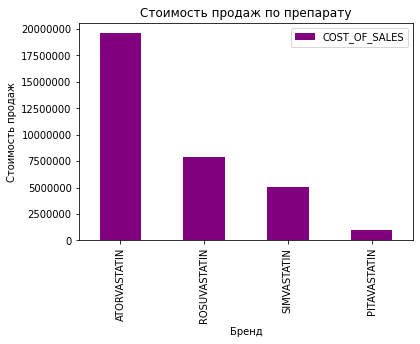

In [29]:
# здесь мы видим потенциальных конкурентов Platorel (а именно по продажам лидирует ATORVASTATIN)
plt.figure(figsize=(16, 9))

final_df.groupby('MOLECULE').agg({'COST_OF_SALES' : 'sum'}) \
        .sort_values(by = 'COST_OF_SALES', ascending  = False) \
.plot(kind='bar', color='purple')
plt.title('Стоимость продаж по препарату')
plt.xlabel('Бренд')
plt.ylabel('Стоимость продаж')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## График стоимости продаж по брендам

<Figure size 1152x648 with 0 Axes>

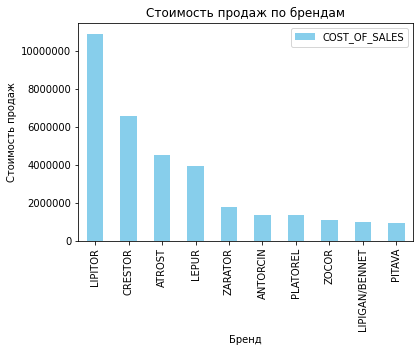

In [30]:
plt.figure(figsize=(16, 9))

final_df.groupby('PRODUCT').agg({'COST_OF_SALES' : 'sum'}) \
        .sort_values(by = 'COST_OF_SALES', ascending  = False) \
.plot(kind='bar', color='skyblue')
plt.title('Стоимость продаж по брендам')
plt.xlabel('Бренд')
plt.ylabel('Стоимость продаж')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## График  стоимости продаж по областям

<Figure size 1152x648 with 0 Axes>

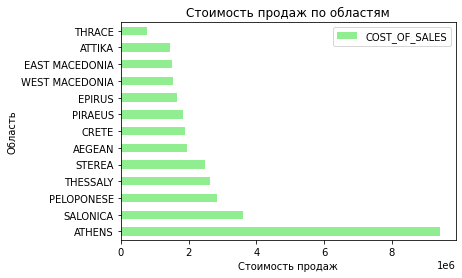

In [31]:
plt.figure(figsize=(16, 9))

final_df.groupby('AREANAME').agg({'COST_OF_SALES' : 'sum'}) \
        .sort_values(by = 'COST_OF_SALES', ascending  = False) \
.plot(kind='barh', color='lightgreen')
plt.title('Стоимость продаж по областям')
plt.xlabel('Стоимость продаж')
plt.ylabel('Область')
plt.show()

## График уровня бренда по направлению продукта

<Figure size 1152x648 with 0 Axes>

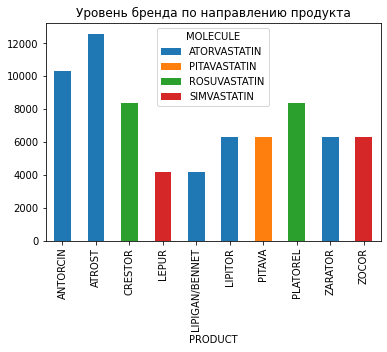

In [32]:
plt.figure(figsize=(16, 9))

final_df.groupby(['PRODUCT', 'MOLECULE']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Уровень бренда по направлению продукта')
plt.show()

In [33]:
# детализация Год -> Квартал -> Месяц
final_df['TIMESTAMP'] = pd.to_datetime(final_df['TIMESTAMP'])
final_df['Year'] = final_df['TIMESTAMP'].dt.year
final_df['Quarter'] = final_df['TIMESTAMP'].dt.quarter
final_df['Month'] = final_df['TIMESTAMP'].dt.month

## График доли площади для областей

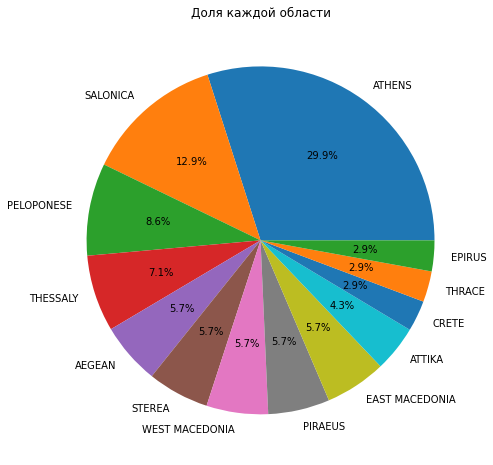

In [34]:
area_share = final_df['AREANAME'].value_counts() / final_df['AREANAME'].value_counts().sum() * 100

plt.figure(figsize=(8, 8))

plt.pie(area_share, labels=area_share.index, autopct='%1.1f%%')
plt.title('Доля каждой области')
plt.show()

## Графики объема продаж в разрере временных меток

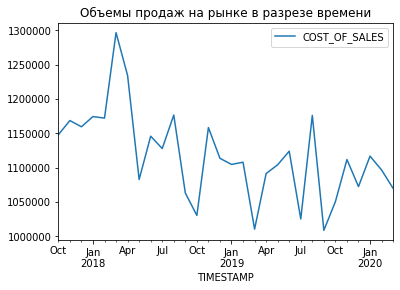

In [35]:
sales_volume = final_df.groupby('TIMESTAMP').agg({'COST_OF_SALES' : 'sum'}).plot()
plt.title('Объемы продаж на рынке в разрезе времени')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

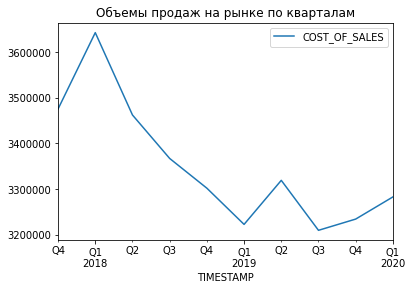

In [36]:
# Объемы продаж на рынке по кварталам
final_df.groupby(final_df['TIMESTAMP'].dt.to_period("Q")).agg({'COST_OF_SALES' : 'sum'}).plot()
plt.title('Объемы продаж на рынке по кварталам')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

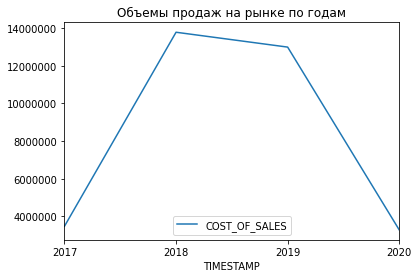

In [37]:
# Объемы продаж на рынке по годам')
final_df.groupby(final_df['TIMESTAMP'].dt.to_period("Y")).agg({'COST_OF_SALES' : 'sum'}).plot()
plt.title('Объемы продаж на рынке по годам')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## График доли рынка для каждого бренда

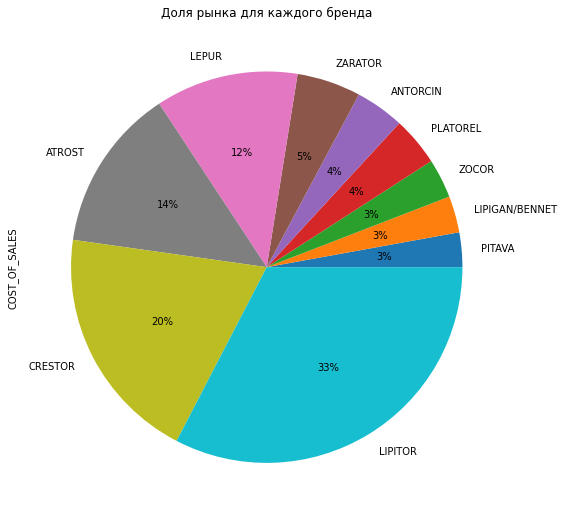

In [38]:
plt.figure(figsize=(16, 9))
total_market_sales = final_df['COST_OF_SALES'].sum()
# (Product / Total Market *100)
market_share = (final_df.groupby('PRODUCT')['COST_OF_SALES'].sum() / final_df['COST_OF_SALES'].sum() * 100).sort_values() \
.plot(kind='pie', autopct='%1.0f%%')
plt.title('Доля рынка для каждого бренда')
plt.show()

In [39]:
evolution = final_df.copy()
evolution['TIMESTAMP'] = evolution['TIMESTAMP'].dt.to_period("Y")
evolution = evolution.groupby(['TIMESTAMP', 'PRODUCT'], as_index = False).agg({'COST_OF_SALES': 'sum'})
evolution['COST_OF_SALES'][7] = 1 #заменим 0 на 1, чтобы делилось нормально (не повлияет на результат)

In [40]:
# рост продукта
evolution['PRODUCT_GROWTH'] \
    = evolution.groupby('PRODUCT')['COST_OF_SALES'].pct_change() #pct_change - вычисляет процентное изменение

In [41]:
# сумма всех продаж за каждый год
evolution['GRAND_TOTAL'] = evolution.groupby('TIMESTAMP')['COST_OF_SALES'].transform('sum')

In [42]:
# рост общих рыночных продаж
evolution['MARKET_GROWTH'] = evolution.groupby('PRODUCT')['GRAND_TOTAL'].pct_change()

In [43]:
# ((100 + ProductGrowth%) / (100 + Market Growth%)) x 100
evolution['EVOLUTION_INDEX'] = ((100 + evolution['PRODUCT_GROWTH']) / (100 + evolution['MARKET_GROWTH']))*100
evolution
# от NaN можно избавиться, но оставил для наглядности, т.к. сравнивается текущий год с предшествующим, но до 2017 данных не было
# не удивительно, что PLATOREL имеет EI 339349.85, судя по всему только "выстрелил" на рынке

,TIMESTAMP,PRODUCT,COST_OF_SALES,PRODUCT_GROWTH,GRAND_TOTAL,MARKET_GROWTH,EVOLUTION_INDEX
0,2017,ANTORCIN,138335.17,nan,3475525.51,nan,nan
1,2017,ATROST,413715.07,nan,3475525.51,nan,nan
2,2017,CRESTOR,908747.90,nan,3475525.51,nan,nan
3,2017,LEPUR,408191.80,nan,3475525.51,nan,nan
4,2017,LIPIGAN/BENNET,108429.55,nan,3475525.51,nan,nan
5,2017,LIPITOR,1109487.68,nan,3475525.51,nan,nan
6,2017,PITAVA,83664.27,nan,3475525.51,nan,nan
7,2017,PLATOREL,1.00,nan,3475525.51,nan,nan
8,2017,ZARATOR,188273.11,nan,3475525.51,nan,nan
9,2017,ZOCOR,116679.96,nan,3475525.51,nan,nan


In [44]:
evolution.sort_values(by = ['TIMESTAMP', 'EVOLUTION_INDEX'], ascending = False)
# видим, что с 2018 по 2020 лидирует PLATOREL

,TIMESTAMP,PRODUCT,COST_OF_SALES,PRODUCT_GROWTH,GRAND_TOTAL,MARKET_GROWTH,EVOLUTION_INDEX
37,2020,PLATOREL,238118.39,-0.69,3282678.83,-0.75,100.06
36,2020,PITAVA,104122.92,-0.74,3282678.83,-0.75,100.01
31,2020,ATROST,442305.96,-0.75,3282678.83,-0.75,100.00
35,2020,LIPITOR,1078512.85,-0.75,3282678.83,-0.75,100.00
34,2020,LIPIGAN/BENNET,97724.58,-0.75,3282678.83,-0.75,100.00
32,2020,CRESTOR,556114.02,-0.75,3282678.83,-0.75,99.99
30,2020,ANTORCIN,129519.98,-0.75,3282678.83,-0.75,99.99
33,2020,LEPUR,377615.42,-0.75,3282678.83,-0.75,99.99
39,2020,ZOCOR,101861.35,-0.76,3282678.83,-0.75,99.99
38,2020,ZARATOR,156783.36,-0.77,3282678.83,-0.75,99.98


In [45]:
# дорогостоящие товары
final_df.groupby('PRODUCT')['PRICE'].max().sort_values(ascending = False)

PRODUCT
PITAVA           30.95
PLATOREL         16.89
CRESTOR          12.82
ZARATOR           7.30
LEPUR             6.82
ATROST            6.49
ANTORCIN          6.46
LIPITOR           5.08
ZOCOR             3.40
LIPIGAN/BENNET    3.40
Name: PRICE, dtype: float64

In [49]:
# evolution.to_excel('evolution.xlsx')

In [50]:
# final_df.to_excel('final_df.xlsx')

# SUMMARY

В ходе анализа рынка фармацевтичских средств, были сделаны следующие заключения: \
1. Лидером среди областей по продаже средств являются Афины (ATHENS) с общими продажами в 9417606.96 у.е.
2. Наиболее часто продаваемым препаратом является Аторвастатин (ATORVASTATIN) с общими продажами в 19592918.08 у.е.
3. Самым распросратненным брендом является Липтитор (LIPITOR) с общими продажами в	10932193.24 у.е.
4. Афины (ATHENS) занимают 1/3 часть от продаж по площали среди всех областей (29.9%/100%)
5. Крупнейшими брендами, занимающими большую долю рынка стали Lipitor (33%), Crestor (20%), Atrost (14%) и Lepur (12%)
6. Исходя из индекса эволюции, с 2018 по 2020 лидирует бренд PLATOREL: в 2019 году рост компании на 1.25% превысил рыночный рост, а в 2020 на 0.06%. В результате чего данный рост позволил PLATOREL удерживать лидирующие позиции на протяжении 3х лет. Но также стоит учесть, что со временем рыночный рост упал практически на 4%. 
7. У PLATOREL достаточно много сильных конкурентов, которые значительно обгоняют продукт по продажам. Тем более, PLATOREL один из самых дорогих товаров на рынке согласно цене (PRICE).